## 수치 미분

In [5]:
def numerical_diff(f,x):
    h=1e-4 # 0.00001
    return (f(x+h) - f(x-h)) / (2*h)

def function_1(x):
    return 0.01*x**2 + 0.1*x

def tangent_line(f,x):
    d = numerical_diff(f,x)
    print(d)
    y = f(x)-d*x
    return lambda t:d*t+y

0.2999999999986347


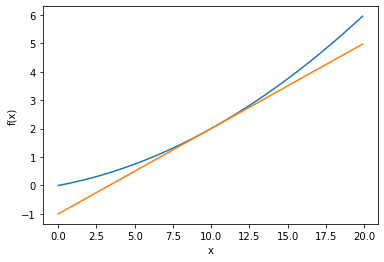

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

x=np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1간격의 배열x
y=function_1(x)

tf=tangent_line(function_1, 10)
y2=tf(x)

plt.xlabel('x'); plt.ylabel('f(x)')
plt.plot(x,y)
plt.plot(x,y2)
plt.show()

### 편미분

In [18]:
def _numerical_gradient_no_batch(f,x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val=x[idx]
        
        # f(x+h)계산
        x[idx]=float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h)계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2)/(2*h)
        x[idx] = tmp_val # 값 복원
    return grad

def numerical_gradient(f, X):
    if X.ndim ==1:
        return _numerical_gradient_no_batch(f,X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f,x)
            
        return grad

In [19]:
def function_2(x):
    if x.ndim ==1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)
    
def tangent_line(f,x):
    d=numerical_gradient(f,x)
    print(d)
    y=f(x)-d*x
    return lambda t: d*t + y

No handles with labels found to put in legend.


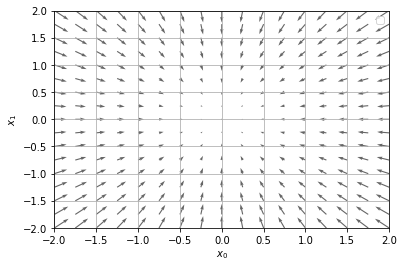

In [20]:
x0 = np.arange(-2,2.5,0.25)
x1 = np.arange(-2,2.5,0.25)
X,Y = np.meshgrid(x0,x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2,np.array([X,Y]))
plt.figure()
plt.quiver(X,Y,-grad[0],-grad[1],angles="xy",color="#666666")
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.grid()
plt.legend()
plt.draw()
plt.show()

### 경사하강법

In [21]:
def gradient_descent(f,init_x, lr=0.01,step_num=100):
    x=init_x
    x_history=[]
    
    for i in range(step_num):
        x_history.append(x.copy())
    
        grad = numerical_gradient(f,x)
        x-=lr*grad
    
    return x, np.array(x_history)    

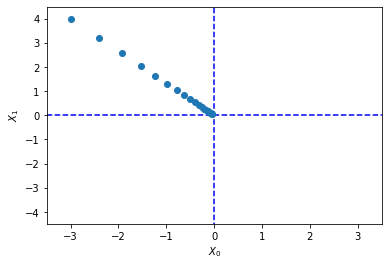

In [22]:
init_x = np.array([-3.0,4.0])

lr = 0.1
step_num = 20
x,x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot([-5,5],[0,0],'--b')
plt.plot([0,0],[-5,5],'--b')
plt.plot(x_history[:,0],x_history[:,1],'o')

plt.xlim(-3.5,3.5)
plt.ylim(-4.5,4.5)
plt.xlabel("$X_0$")
plt.ylabel("$X_1$")
plt.show()

### 신경망에서의 기울기

In [28]:
import sys, os
sys.path.append(os.pardir)
import numpy as np


def cross_entropy_error(y, t):
    delta = 1e-7 # log0 방지
    return -np.sum(t*np.log(y + delta))

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y
    
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [30]:
x = np.array([0.6,0.9])
t = np.array([0,0,1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(net.W)
print(dW)

[[-0.98827595 -0.77909748 -0.77557816]
 [-0.23107712 -1.52559972  0.22607476]]
[[ 0.19556738  0.0691544  -0.26472179]
 [ 0.29335107  0.10373161 -0.39708268]]
